# PRUEBA DS GASES-HT

# TEORÍA

## SQL


**A. ¿Cuál es la estructura básica de un SELECT?**

*SELECT* : Es una sentencia y tipo de consulta básica muy utilizada para consultar datos de las tablas de nuestra base de datos. 

SELECT incluye las siguientes cláusulas:

- DISTINCT: Operador  para seleccionar filas distintas.

- ORDER BY: Clausula para ordenar filas.

- WHERE: Claúsla para filtrar filas.

- LIMIT o FETCH: Útiles para seleccionar un subconjunto de filas de una tabla.

- GROUP BY: Se usa para agrupar filas en grupos.

- HAVING: Se usa para filtrar grupos.

- INNER JOIN, LEFT JOIN, FULL OUTER JOIN y CROSS JOIN: Cláusulas para unir tablas.

- UNION, INTERSECT y EXCEPT: Para realizar operaciones de conjunto.

***Síntaxis:***

SELECT select_list FROM table_name;

Ejemplo:




Para ejemplificar como funciona la sentencia SELECT, hemos creado una base de datos PostgreSQL en Railway. Realizaremos las consultas en la consola para consultas SQL de PgAdmin

- Importamos las librerías necesarias:

In [281]:
import os
import pandas as pd
import torch
import torchaudio
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import librosa
import librosa.display
import IPython.display as ipd
import sklearn
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
import altair as alt
import plotly.graph_objs as go
import re
import calendar
import seaborn as sns
from pandas.plotting import parallel_coordinates

## Análisis exploratorio de los datos (EDA)

Realizamos la importación de los datos:

In [282]:
DATOS=pd.read_csv(r"C:\Users\ANGIE VANESA\PROYECTOS\Prueba_Gases\data.csv")
DATOS.head()

,PERIODO,ID CLIENTE,DEPARTAMENTO,CLASIFICACION,CONSUMO,TIPO CONSUMO
0,1/1/2021,1068535,ATLANTICO,RESIDENCIAL,0,REAL
1,1/1/2021,1095302,ATLANTICO,COMERCIAL,21,REAL
2,1/1/2021,1131454,ATLANTICO,RESIDENCIAL,0,REAL
3,1/1/2021,1134487,ATLANTICO,COMERCIAL,132,REAL
4,1/1/2021,1140821,ATLANTICO,RESIDENCIAL,0,REAL


### Verificación de datos faltantes

Vemos que los datos no tienen registros faltantes:

In [283]:
datos_faltantes=DATOS.isnull().sum()
datos_faltantes

PERIODO          0
ID CLIENTE       0
DEPARTAMENTO     0
CLASIFICACION    0
CONSUMO          0
TIPO CONSUMO     0
dtype: int64

In [284]:
DATOS.shape

(312, 6)

La data está conformada por 312 registros y 6 columnas, cuyos nombres son:

In [285]:
DATOS.columns

Index(['PERIODO', 'ID CLIENTE', 'DEPARTAMENTO', 'CLASIFICACION', 'CONSUMO',
       'TIPO CONSUMO'],
      dtype='object')

### Variables

En los datos se tienen 6 variables: 

- Periodo: las fechas de registro de consumo mensual. 

- ID cliente: Código de identificación del cliente.

- Departamento: Territorio nacional donde se encuentra ubicado el cliente.

- Clasificación: Etiqueta asignada para categorizar al cliente según el tipo de cliente o el uso que se le da al consumo registrado.

- Consumo: Registro del consumo mensual de cada cliente.

- Tipo de consumo: Esta variable nos indica si el registro de consumo de los clientes fue real o estimado 


#### Análisis descriptivo univariado

Los datos corresponde al registro del consumo mensual de una lista de clientes, identificados con un código o ID diferente. Se realizó un filtro para identificar cuántos clientes se encuentran en la muestra obteniéndose:

In [286]:
DATOS['ID CLIENTE'].unique()

array([ 1068535,  1095302,  1131454,  1134487,  1140821,  1999658,
        2058257,  2076530,  2084470,  6089526,  6111795,  8091803,
        8092746, 17067567, 17186468, 50002330, 50043502, 50071540,
       50095570, 50157457, 50599279, 50689487, 51030818, 51390294,
       51577033, 51639236], dtype=int64)

In [287]:
len(DATOS['ID CLIENTE'].unique())

26

En total son 26 clientes, a los cuales se les hizo un registro mensual de su consumo. A continuación se realizará un análisis descriptivo de los clientes:

In [288]:
datos=DATOS[['ID CLIENTE', 'DEPARTAMENTO','CLASIFICACION']].drop_duplicates()
datos.head()

,ID CLIENTE,DEPARTAMENTO,CLASIFICACION
0,1068535,ATLANTICO,RESIDENCIAL
1,1095302,ATLANTICO,COMERCIAL
2,1131454,ATLANTICO,RESIDENCIAL
3,1134487,ATLANTICO,COMERCIAL
4,1140821,ATLANTICO,RESIDENCIAL


#### Departamento

In [289]:
pd.DataFrame(datos['DEPARTAMENTO'].describe(include=object)).T

,count,unique,top,freq
DEPARTAMENTO,26,2,ATLANTICO,19


Podemos ver que la variable ***Departamento*** es categórica  y tiene dos niveles, uno  es **Atlantico** el cual tiene mayor frecuencia, representando aproximadamente el 73% de los clientes registrados. A continuación un diagrama de barras: 

In [290]:
fig=px.bar(datos['DEPARTAMENTO'].value_counts().sort_index(),
           x=datos['DEPARTAMENTO'].value_counts().index,
           y=datos['DEPARTAMENTO'].value_counts().values,
           labels={'x':'Departamento', 'y':'Frecuencia'},
           title='Departamento: Frecuencia',
           color_discrete_sequence=['#17becf']).update_layout(xaxis_title='Departamento',
                                            yaxis_title='Frecuencia',
                                            xaxis=dict(categoryorder='total descending'),
                                            height=500, width=600)
fig.show()

Hay 7 registros de la categoría ***Magdalena*** en los datos, representando un 26,9%. Vemos que de los 26 clientes, gran parte son del departamento del Atlántico.

#### Clasificación

In [291]:
pd.DataFrame(datos['CLASIFICACION'].describe(include=object)).T

,count,unique,top,freq
CLASIFICACION,26,3,RESIDENCIAL,15


La variable ***Clasificacion*** tiene 3 niveles o categorías, siendo la categoría **Residencial** la más frecuente; se tiene en total 15 clientes con esta categoría, representando un 57,6% del total.

In [292]:
fig=px.bar(datos['CLASIFICACION'].value_counts().sort_index(),
           x=datos['CLASIFICACION'].value_counts().index,
           y=datos['CLASIFICACION'].value_counts().values,
           labels={'x':'Clasificación', 'y':'Frecuencia'},
           title='Clasificación: Frecuencia',
           color_discrete_sequence=['#17becf']).update_layout(xaxis_title='Clasificación',
                                            yaxis_title='Frecuencia',
                                            xaxis=dict(categoryorder='total descending'),
                                            height=500, width=600).show()

El diagrama de barras anterior nos muestra la frecuencia de cada categoría en la variable ***Clasificacion***. La segunda categoría es **Comercial** con 6 registros, mientras que la categoría **Industrial** cuenta con 5 registros. Vemos que los clientes se encuentran categorizados, y la mayoría de estos son parte del sector residencial.

#### Tipo de consumo

In [293]:
DATOS['TIPO CONSUMO'].unique()

array(['REAL', 'ESTIMADO'], dtype=object)

La variable ***Tipo consumo*** también es categórica, con dos categorías: 

- REAL

- ESTIMADO

- Tipo de consumo en el año:

Los datos entregan información sobre el tipo de consumo mensual en cada cliente durante el año 2021:

In [294]:
fig=px.bar(DATOS['TIPO CONSUMO'].value_counts().sort_index(),
           x=DATOS['TIPO CONSUMO'].value_counts().index,
           y=DATOS['TIPO CONSUMO'].value_counts().values,
           labels={'x':'Tipo de consumo', 'y':'Frecuencia'},
           title='Tipo de consumo: Frecuencia',
           color_discrete_sequence=['#17becf']).update_layout(xaxis_title='Tipo de consumo',
                                            yaxis_title='Frecuencia',
                                            xaxis=dict(categoryorder='total descending'),
                                            height=500, width=600).show()

El diagrama de barras anterior nos muestra que la categoría **Real** es la que más registros tuvo en la muestra. **Estimado** es la segunda categoría de esta variable, con una pequeña proporción de registros, menos del 3%. Gran parte de los clientes en la muestra contaron con un registro de consumo "real" durante el año 2021
.

- Tipo de consumo por periodo

In [295]:
DATOS['PERIODO'] = pd.to_datetime(DATOS['PERIODO'])
DATOS['MES'] = DATOS['PERIODO'].dt.strftime('%B')
meses_ord= ["January", "February", "March", "April", "May", "June", 
            "July", "August", "September", "October", "November", "December"]
Tipo_consumo=DATOS[['MES','TIPO CONSUMO']]
Tipo_consumo['MES'] = pd.Categorical(Tipo_consumo['MES'], categories=meses_ord, ordered=True)
Tipo_consumo=Tipo_consumo.groupby(['MES','TIPO CONSUMO']).size().reset_index(name='count')
Tipo_consumo.head()

,MES,TIPO CONSUMO,count
0,January,ESTIMADO,0
1,January,REAL,26
2,February,ESTIMADO,0
3,February,REAL,26
4,March,ESTIMADO,0


In [296]:
fig=px.bar(Tipo_consumo, x='MES', y='count', color='TIPO CONSUMO',
           labels={'count':'Frecuencia','TIPO CONSUMO':'Tipo de consumo','MES':'Meses'},
           title='Tipo de consumo por mes: Frecuencia',
           color_discrete_sequence=px.colors.qualitative.Set2).update_layout(yaxis=dict(dtick=5),barmode='group', 
                                                              height=500,
                                                              width=600).show()

El diagrama de barras anterior nos muestra que los primeros tres meses del año , mayo y diciembre, los 26 clientes registraron un tipo de consumo **real**, mientras que hubo meses donde algunos clientes tuvieron un tipo de consumo **estimado** (*En verde*)

#### Consumo

- Consumo anual en la muestra:

El siguiente resumen corresponde a un análisis descriptivo de la variable numérica consumo:

In [297]:
pd.DataFrame(DATOS['CONSUMO'].describe()).T

,count,mean,std,min,25%,50%,75%,max
CONSUMO,312.0,1226.971154,3234.101606,-75.0,11.0,20.0,353.75,23748.0


- El registro de consumo promedio en el año 2021 fue de 1226,97 con una desviación estándar de 3234.10; esta desviación nos indica una gran variabilidad en los datos.

- El valor mínimo de consumo registrado es -75, este dato al ser negativo es candidato a ser un dato atípico, ya que la variable consumo debería ser positiva.

- El valor máximo registrado fue 23.748 el cual es bastante elevado comparado con los otros registros, esto teniendo en cuenta que un 75% de los registros es inferior a 353.75. Se validará si es un posible dato atípico. 

- El 50% del consumo anual fue menor o igual a 20. Dado que la mediana de los datos es muy inferior a la media, es decir, la distribución de los datos está sesgada hacia la derecha, como puede verse en el siguiente gráfico:


In [298]:
fig=px.histogram(DATOS, x='CONSUMO', nbins=30, title='Consumo: Histograma', 
                 labels={"value":"Consumo", "count":"Frecuencia"}, color_discrete_sequence=['#17becf']).update_layout(height=400,width=500).show()

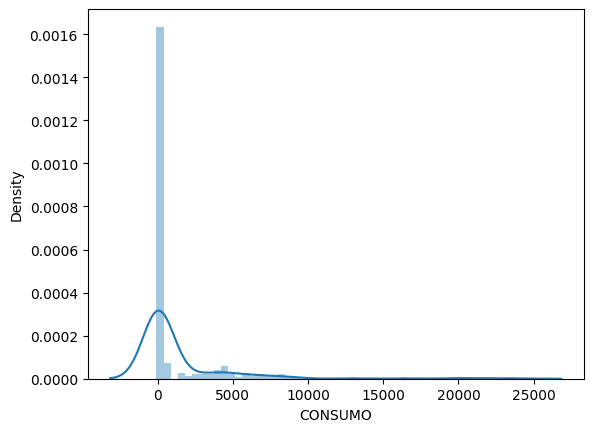

In [299]:
sns.distplot(DATOS.CONSUMO);

El gráfico anterior nos muestra como la gran parte de los datos se acumulan a la izquierda.

- Consumo mensual por cliente

In [300]:
DATOS['MES_NUM'] = DATOS['PERIODO'].dt.month
DATOS=pd.DataFrame(DATOS)
DATOS.head()

,PERIODO,ID CLIENTE,DEPARTAMENTO,CLASIFICACION,CONSUMO,TIPO CONSUMO,MES,MES_NUM
0,2021-01-01,1068535,ATLANTICO,RESIDENCIAL,0,REAL,January,1
1,2021-01-01,1095302,ATLANTICO,COMERCIAL,21,REAL,January,1
2,2021-01-01,1131454,ATLANTICO,RESIDENCIAL,0,REAL,January,1
3,2021-01-01,1134487,ATLANTICO,COMERCIAL,132,REAL,January,1
4,2021-01-01,1140821,ATLANTICO,RESIDENCIAL,0,REAL,January,1


- Consumo por clasificación

***Residencial***

In [301]:
consumo_residencial=DATOS[['CONSUMO','CLASIFICACION','MES_NUM','MES']][DATOS['CLASIFICACION']=='RESIDENCIAL']
pd.DataFrame(consumo_residencial['CONSUMO'].describe()).T

,count,mean,std,min,25%,50%,75%,max
CONSUMO,180.0,12.094444,7.5485,0.0,9.0,13.0,18.0,32.0


Los clientes del sector residencial tienen un consumo anual promedio de 12,09 con una desviación estándar de 7.54. El siguiente gráfico es un diagrama de cajas donde podemos visualizar los quintiles, se observa la presencia de un posible dato atípico

In [302]:
fig = px.box(consumo_residencial, x='CONSUMO', y='CLASIFICACION', 
             color_discrete_sequence=['#17becf']).update_layout(height=400, width=600).show()

***Industrial***

In [303]:
consumo_industrial=DATOS[['CONSUMO','CLASIFICACION','MES_NUM','MES']][DATOS['CLASIFICACION']=='INDUSTRIAL']
pd.DataFrame(consumo_industrial['CONSUMO'].describe()).T

,count,mean,std,min,25%,50%,75%,max
CONSUMO,60.0,6128.466667,4982.196485,78.0,3522.25,4597.0,7042.0,23748.0


Los clientes del sector industrial tiene un consumo promedio anual de 6128.46 con una desviación de 4982.19. El consumo mínimo registrado fue de 78, mientras que el consumo máximo registrado fue de 23748. El siguiente boxplot nos muestra posibles datos atípicos.

In [304]:
fig = px.box(consumo_industrial, x='CONSUMO', y='CLASIFICACION', 
             color_discrete_sequence=['#17becf']).update_layout(height=400, width=600).show()

***Comercial***

In [305]:
consumo_comercial=DATOS[['CONSUMO','CLASIFICACION','MES_NUM','MES']][DATOS['CLASIFICACION']=='COMERCIAL']
pd.DataFrame(consumo_comercial['CONSUMO'].describe()).T

,count,mean,std,min,25%,50%,75%,max
CONSUMO,72.0,179.583333,176.869392,-75.0,33.5,112.0,360.5,582.0


Los clientes del sector comercial tiene un consumo promedio anual de 179.58 con una desviación de 176.86 . se identifica un registro negativo que probablemente sea un dato atípico, ya que el consumo no puede ser negativo

In [306]:
fig = px.box(consumo_comercial, x='CONSUMO', y='CLASIFICACION', 
             color_discrete_sequence=['#17becf']).update_layout(height=400, width=600).show()

- Consumo por mes según tipo de clasificación

***Residencial: Consumo Mensual***

In [307]:
fig = px.box(consumo_residencial, x='MES', y='CONSUMO',color='MES').update_layout(showlegend=False,
                                                                                title='Residencial: Consumo Mensual',
                                                                                height=400, width=600).show()

El boxplot anterior nos muestra el consumo por mes para los clientes del sector residencial. En los meses de Abril y Mayo se registran dos posibles datos atípicos. vemos algunos registros por encima de 25 en los meses de Enero, Febrero, Marzo y Abril. En general, los registros promedios mensuales estuvieron entre 10 a 15. 

***Industrial: Consumo mensual***

En el caso de los clientes del sector industrial hay variabilidad en los reportes mensuales de consumo. El mes de junio es donde se registra el menor consumo, con un registro máximo de 4537. El mes de Marzo registra un aumento significativo en el consumo, el 50% de los clientes registraron un consumo superior a 8519, con un registro máximo de hasta 23748. Se registran posibles datos atípicos en los meses de enero , junio y diciembre.

A partir del mes de marzo y hasta el mes de junio se observa una tendencia a disminuir en el consumo de los clientes del sector industrial, luego este consumo aumenta levemente hasta los meses de octubre.

In [308]:
fig = px.box(consumo_industrial, x='MES', y='CONSUMO', color='MES').update_layout(showlegend=False,
                                                                                  title='Industrial: Consumo Mensual',
                                                                                  height=400, width=600).show()

***Comercial: Consumo mensual***

Para el caso de los clientes en el sector comercial, no se observa mucha variabilidad de mes a mes. el 50% de los clientes tuvieron un consumo superiro a 81.5 mensualmente. Algunos con registros máximos de hasta 582. En el mes de noviembre se observa un registro mínimo de -75, es probable que haya habido un equivocación al ingresar esta información. 

In [309]:
fig = px.box(consumo_comercial, x='MES', y='CONSUMO',color='MES').update_layout(showlegend=False,
                                                                                title='Comercial: Consumo Mensual',
                                                                                height=400, width=600).show()

## Planteamiento del modelo

Hacemos una visualización de nuestro conjunto de datos nuevamente:

In [310]:
DATOS.head()

,PERIODO,ID CLIENTE,DEPARTAMENTO,CLASIFICACION,CONSUMO,TIPO CONSUMO,MES,MES_NUM
0,2021-01-01,1068535,ATLANTICO,RESIDENCIAL,0,REAL,January,1
1,2021-01-01,1095302,ATLANTICO,COMERCIAL,21,REAL,January,1
2,2021-01-01,1131454,ATLANTICO,RESIDENCIAL,0,REAL,January,1
3,2021-01-01,1134487,ATLANTICO,COMERCIAL,132,REAL,January,1
4,2021-01-01,1140821,ATLANTICO,RESIDENCIAL,0,REAL,January,1


In [315]:
DATOS[['CONSUMO','MES','ID CLIENTE']][DATOS['CONSUMO']==0].groupby(['ID CLIENTE', 'MES'])['CONSUMO'].sum().reset_index()

,ID CLIENTE,MES,CONSUMO
0,1068535,April,0
1,1068535,August,0
2,1068535,December,0
3,1068535,February,0
4,1068535,January,0
5,1068535,July,0
6,1068535,June,0
7,1068535,March,0
8,1068535,May,0
9,1068535,November,0


Vemos que tres clientes con ID (1068535,1131454,1140821	) no reportaron registros de consumo en todo el año. Probablemente ya estos clientes no están activos o simplemente no se les hizo lectura de consumo. Para poder implementar los modelos eliminaremos estos clientes ya que no hay registro de consumo anual de estos. 

In [331]:
IDs_a_filtrar = [1140821, 1131454, 1068535]
DATOS = DATOS.drop(DATOS[DATOS['ID CLIENTE'].isin(IDs_a_filtrar)].index)
DATOS=DATOS[['CONSUMO','DEPARTAMENTO','CLASIFICACION','TIPO CONSUMO','MES_NUM']]
DATOS.head()

,CONSUMO,DEPARTAMENTO,CLASIFICACION,TIPO CONSUMO,MES_NUM
1,21,ATLANTICO,COMERCIAL,REAL,1
3,132,ATLANTICO,COMERCIAL,REAL,1
5,6165,ATLANTICO,INDUSTRIAL,REAL,1
6,7,MAGDALENA,RESIDENCIAL,REAL,1
7,24,MAGDALENA,RESIDENCIAL,REAL,1


Se tienen estas variables explicativas y una variable dependiente (CONSUMO). Se extrajo el registro del mes de la columna PERIODO para contar con esta variable numérica. Identificaremos si hay correlación entre variables explicativas y la variable CONSUMO:

- Consumo por mes

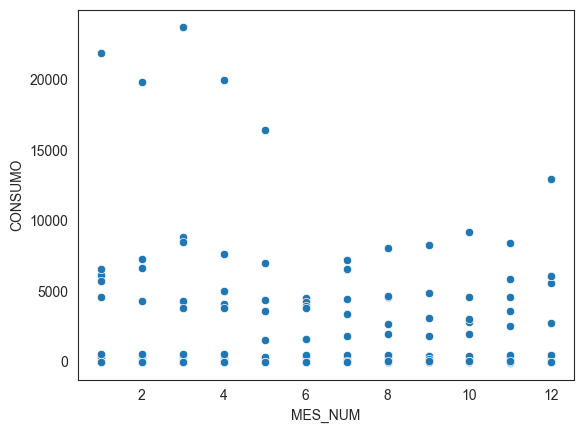

In [332]:
sns.set_style("white")
ax1 = sns.scatterplot(x="MES_NUM", y="CONSUMO", data=DATOS)

El siguiente gráfico representa el consumo medio mensual, y la línea sombreada representa el intervalo de confianza que por defecto es del 95%.

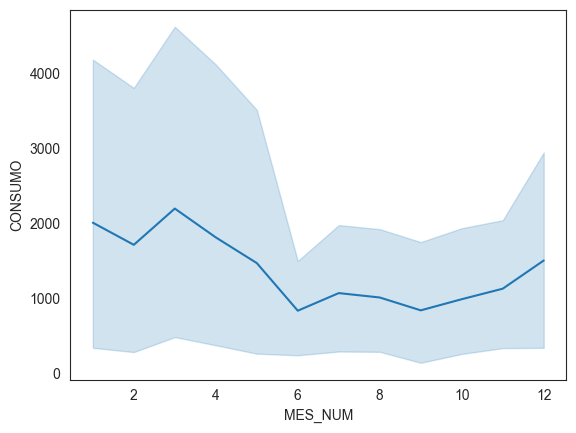

In [333]:
ax = sns.lineplot(x="MES_NUM", y="CONSUMO", data=DATOS)

Text(0.5, 1.0, 'TIPO INDUSTRIAL')

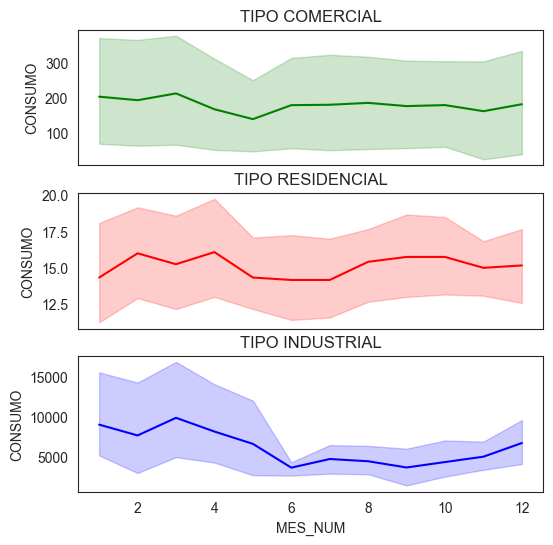

In [360]:
fig, ax = plt.subplots(3,1, sharex=True,  figsize=(6, 6))
sns.lineplot(x="MES_NUM", y="CONSUMO", data=DATOS[DATOS['CLASIFICACION']=='COMERCIAL'], color='green', ax=ax[0])
ax[0].set_title('TIPO COMERCIAL')
sns.lineplot(x="MES_NUM", y="CONSUMO", data=DATOS[DATOS['CLASIFICACION']=='RESIDENCIAL'], color='red', ax=ax[1])
ax[1].set_title('TIPO RESIDENCIAL')
sns.lineplot(x="MES_NUM", y="CONSUMO", data=DATOS[DATOS['CLASIFICACION']=='INDUSTRIAL'], color='blue', ax=ax[2])
ax[2].set_title('TIPO INDUSTRIAL')

- Correlación entre variable **CONSUMO** y **MES**